# Métodos de Monte Carlo
## Estadística Bayesiana


El objetivo es generar observaciones (i.e una muestra) de una distribución dada y/o calcular valores de integrales.

## Integración Monte Carlo

El primer _muestreo aleatorio_ documentado es el usado por Comte de Buffon en el denominado "El problema de la aguja de Buffón".

### Método "hit-or-miss"-

Considere un evento $A$ tal que $P(A) = p$. Defina una sucesión de v.a.i.i.d tal que para cada $k\in\mathbb{N}^{+}$,

$$
  X_k = \begin{cases}
          1 &\text{ si ocurre }A \\
          0 &\text{c.o.c}
        \end{cases}
$$

Claramente, para cada $k$, $X_k \sim \mathcal{Ber}(p)$.

El estimador de M.V para $p$ es $\hat{p} = \frac{\sum_{k=1}^{n}X_k}{n}$, y por la Ley Fuerte de los Grandes Números

$$
  \lim _{n\to\infty} \frac{\sum_{k=1}^{n}X_k}{n} \stackrel{c.s}{=} p
$$

Es decir, para estimar $p$ podemos usar $\frac{\sum_{k=1}^{n}X_k}{n}$ con $n$ suficientemente grande.

Ejemplo (Estimación de $\pi$)

Suponga que tenemos un disco de radio 1 adentro de un cuadrado cuyos lados miden 2. Se lanza una pequeña (puntual) aguja hacia el cuadrado y nos interesa conocer la probabilidad de que la pequeña aguja caiga adentro del disco.

_Sol:_

Usando probabilidad geométrica es claro que el resultado es $\frac{\pi}{4}$.

Usando el método "hit-or-miss" debemos dar un evento $A$ cuya probabilidad nos interese.

Sea $A:\text{"La aguja puntual cae adentro del disco"}$.

Si $(U_1, U_2)\in[-1,1]\times[-1,1]$ son las coordenadas de la aguja, entonces el evento $A$ se traduce a que $U_1^{2} + U_2 ^{2} \leq 1$, con $U_i$ v.a uniformes en $[-1,1]$.

Ahora definimos una sucesión de v.a tales que

$$
  X_k = \begin{cases}
          1 &\text{ si } U_1^{2} + U_2 ^{2} \leq 1 \\
          0 &\text{c.o.c}
        \end{cases}
$$

Como $X_k$ son indicadoras, su esperanza es la probabilidad de su evento.

$$
\mathbb{E}(X_k) = P(A) = \mathbb{P}(U_1^{2} + U_2 ^{2} \leq 1) = \frac{\pi}{4}
$$

Esta última igualdad la sabemos por proba geométrica.
Lo interesante de esto es que usando $4\frac{\sum_{k=1}^{n}X_k}{n}$ podemos estimar $\pi$ con probabilidad 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from abc import abstractmethod, ABC
from scipy.special import beta
from scipy.stats import beta as fbeta
from scipy.stats import norm, gamma


In [ ]:
def experiment_pi(n: int):
  u_1 = np.random.uniform(-1, 1, size=n)
  u_2 = np.random.uniform(-1, 1, size=n)
  x = []

  for x1, x2 in zip(u_1, u_2):
    if (x1 ** 2 + x2**2 <=1):
      x.append(1)
    else:
      x.append(0)

  p = 4 * np.mean(x)
  return p

In [ ]:
experiment_pi(10)

4.0

In [ ]:
experiment_pi(1000)

3.16

In [ ]:
experiment_pi(100000)

3.144

In [ ]:
experiment_pi(10000000)

3.1421624

Lo malo: la convergencia es muy lenta i.e el error es del orden de $\frac{1}{\sqrt{N}}$ [MONTE CARLO SIMULATIONS](https://cse.engineering.nyu.edu/~mleung/CS909/s04/mc4.pdf)

### Método "sample-mean"

Sea $g:[0, 1]\to\mathbb{R}$ una función continua. Queremos estimar $\int_{0}^{1} g(u)du$.

_Ejemplo (Estimación de $\pi$)_.

Considere la función $g:[0,1]\to\mathbb{R}$ dada por,
$$
g(u) = 4 \sqrt{1-u^{2}}
$$
Usando sustitución trigonométrica es fácil ver que $\int_{0}^{1} g(u)du = \pi $.

Considere una sucesión de v.a.i.i.d uniformes en $[0,1]$. La sucesión de v.a dada por $X_k = g(U_k)$ cumple que

$$
\begin{align*}
\mathbb{E}(X_k) &= \mathbb{E}(g(U_k)) \\
                &= \int_{\mathbb{R}} g(u) f_{U}(u) du \\
                &= \int_{\mathbb{R}} g(u) \mathbf{1}_{[0,1]}(u) du \\
                &= \int_{0}^{1} g(u)du
\end{align*}
$$

Por la Ley Fuerte de los Grandes Números podemos estimar $\mathbb{E}(X_k)$ usando $\frac{\sum_{k=1}^{n}X_k}{n}$ con $n$ suficientemente grande.

In [ ]:
def experiment_2(n: int):
  u = np.random.uniform(0, 1, size=n)
  x = 4 * np.sqrt(1 - u ** 2)
  return np.mean(x)

In [ ]:
experiment_2(10)

2.7320438194416097

In [ ]:
experiment_2(1000)

3.1327986124279668

In [ ]:
experiment_2(100000)

3.142094240572566

In [ ]:
experiment_2(10000000)

3.1417032885090137

Lo malo: este método también tiene un error del orden de $\frac{1}{\sqrt{N}}$ [MONTE CARLO SIMULATIONS](https://cse.engineering.nyu.edu/~mleung/CS909/s04/mc4.pdf)

### Muestreo por aceptación-rechazo

El muestreo por rechazo es un algoritmo para simular muestras aleatorias de una distribución dada.

Para hacer inferencia bayesiana necesitamos conocer la distribución posterior, $f(\theta | x)$, o en su defecto, una muestra aleatoria de la posterior.

Si quisiéramos muestrear de variables aleatorias "fáciles", podríamos usar el Teorema fundamental de la simulación (véase [Simulación de variables aleatorias](https://github.com/ivannpy/proba1_2023-2/blob/main/simulacion_va.ipynb)). Lo interesante ocurre cuando es díficil cumplir las hipótesis del teorema anterior.

El muestreo por rechazo nos da una forma de producir una muestra aleatoria de cualquier distribución.

---
__Algoritmo (Muestreo por rechazo):__

Para obtener una muestra aleatoria $x_1,\ldots,x_k \sim f(x)$:
1. Encontrar una densidad $p(x)$ tal que:
  1. Sea fácil muestrear valores que sigan la distribución $p$.
  2. La densidad $p(x)$ sea similar a $f(x)$ en cuanto a localización, dispersión y/o soporte.
  3. Exista $c\in\mathbb{R}$ tal que para toda $x\in\text{ sop }(f)$, $f(x) \leq c p(x)$.
2. Para $i = 1$ hasta $i=n$:
  1. Generar $\hat{x}_i \sim p(x)$ y $u_i \sim U([0,1])$ de manera independiente.
  2. Si $u_i \leq \frac{f(\hat{x}_i)}{c p(\hat{x}_i)}$, aceptar $\hat{x}_i$; en otro caso, rechazar $\hat{x}_i $.

La muestra deseada son los valores aceptados siguiente el algoritmo anterior.

Obs: $n$ tiene que ser suficientemente grande para que se generen $k$ valores aceptados.
La eficiencia del algoritmo se puede medir calculando la _tasa de aceptación_, definida como la proporción de valores aceptados, $k/n$.

---


_Ejemplo_: Obtener una muestra aleatoria de una distribución final $\mathcal{Beta}(5,5)$.

Proponemos $p(x)$ uniforme en $[0,1]$. Además, para toda $x\in[0,1]$,

$$
  \frac{1}{B(5,5)} x^{4} (1-x)^{4} \leq 3 = 3 p(x)
$$

pues si $x\in[0,1]$, $p(x) = 1$.

In [ ]:
class RejectingSampler(ABC):
  def __init__(self, f_obj, f_prop, c):
    """ Constructor de muestreadores por rechazo.

    :param f_obj: Distribución objetivo.
    :param f_prop: Distribución propuesta.
    :param c: Valor constante al que f_obj <= c f_prop
    """
    self._f_obj = f_obj
    self._f_prop = f_prop
    self._c = c

  @abstractmethod
  def draw_from_f_prop(self) -> float:
    """ Método para generar una v.a que siga la densidad propuesta.

    :return: Un valor que sigue la distribución propuesta.
    """
    pass

  def rejection_sampling(self, n: int):
    """ Muestreo por rechazo.

    :param n: Veces que se repetirá el muestreo por rechazo.
    :return: Una tupla con la muestra generada y la tasa de aceptación.
    """
    obj_sample = []

    for i in range(0, n):
      x_i = self.draw_from_f_prop()
      u_i = np.random.uniform(0, 1)
      acep_prob = self._f_obj(x_i) / (self._c * self._f_prop(x_i))

      if u_i <= acep_prob:
        obj_sample.append(x_i)

    acep_rate = len(obj_sample) / n

    return obj_sample, acep_rate


In [ ]:
class BetaSampler(RejectingSampler):
  def __init__(self, f_obj, f_prop, c):
    super().__init__(f_obj, f_prop, c)

  def draw_from_f_prop(self) -> float:
    # Proponemos una uniforme en [0,1]
    x = np.random.uniform(0, 1)
    return x

# Distribución objetivo.
def f_obj(x) -> float:
  a, b = 5, 5

  if x < 0 or x > 1:
    return 0

  cons = 1 / beta(a, b)
  ker = x ** (a - 1)
  ker *= (1 - x) ** (b - 1)

  return cons * ker

# Distribución propuesta
def f_prop(x):
  if x < 0 or x > 1:
    return 0
  return 1



Tasa de aceptación:  0.19801


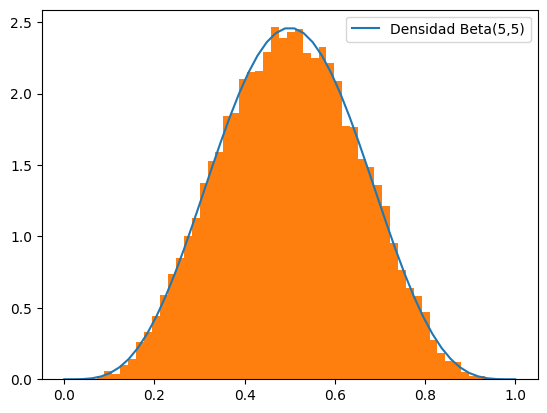

In [ ]:
beta_sampler = BetaSampler(f_obj, f_prop, 5)
sample, rate = beta_sampler.rejection_sampling(100000)

print("Tasa de aceptación: ", rate)

dom = np.linspace(0, 1)
f_beta = fbeta.pdf(dom, 5, 5)
plt.plot(dom, f_beta, label="Densidad Beta(5,5)")
plt.legend()
plt.hist(sample, density=True, bins=50);

_Ejercicio_: Generar una muestra de una distribución $\mathcal{N}(0,1)$.

Proponemos $p(x)$ uniforme en [-5,5]. Note que para toda $x\in[-5,5]$,

$$
  \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \leq 0.4 = (4) (1/10) = 4 p(x)
$$


In [ ]:
class NormalSampler(RejectingSampler):
  def __init__(self, f_obj, f_prop, c):
    super().__init__(f_obj, f_prop, c)

  def draw_from_f_prop(self) -> float:
    """ Proponemos una uniforme en [-5,5]
    """
    x = np.random.uniform(-5, 5)
    return x

# Distribución objetivo
def f_obj_norm(x) -> float:
  mu, sigma2 = 0, 1

  cons = 1 / np.sqrt(2 * np.pi * sigma2)
  ker = np.exp(- 0.5 * (np.power(x - mu, 2) / (2 * sigma2)))
  return cons * ker

# Distribución propuesta
def f_prop_norm(x):
  if x < -5 or x > 5:
    return 0
  return 1


Tasa de aceptación:  0.0353


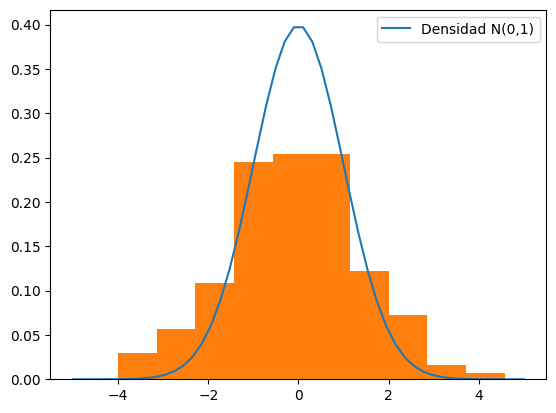

In [ ]:
normal_sampler = NormalSampler(f_obj_norm, f_prop_norm, 4)
sample, rate = normal_sampler.rejection_sampling(10000)

print("Tasa de aceptación: ", rate)

dom = np.linspace(-5, 5)
f_norm = norm.pdf(dom, 0, 1)
plt.plot(dom, f_norm, label="Densidad N(0,1)")
plt.legend()
plt.hist(sample, density=True);

Ref: [Simulation - Lecture 3 - Rejection Sampling](https://www.stats.ox.ac.uk/~rdavies/teaching/PartASSP/2020/lectures_latest/simulation_lecture3.pdf)

### Estimador de Monte Carlo

Sea $X$ una v.a real tal que $sop(X) = \Omega$ y $h:\Omega\to\mathbb{R^{d}}$ una función medible.

El estimador de Monte Carlo para
$$
\mathbb{E}(h(X)) = \begin{cases} \sum_{x\in\Omega} h(x) f_{X}(x) &\text{ si $X$ es discreta} \\ \int_{\Omega}h(x) f_{X}(x)dx &\text{ si $X$ es continua}  \end{cases}
$$
es
$$
\hat{\mathbb{E}(h(X))}_{MC} = \frac{1}{n}\sum_{i=1}^{n}h(X_i)
$$
donde $X_i$ es una muestra aleatoria de $f_X$.

Lo anterior se puede implementar con el siguiente

---
__Algoritmo (Monte Carlo):__
Para estimar $\mathbb{E}(h(X))$,
1. Generar una muestra aleatoria $x_1,\ldots x_n$ de una población $f_X$.
2. Calcular $\frac{1}{n}\sum_{i=1}^{n}h(x_i)$
---

Note que si sabemos cómo muestrear de una variable aleatoria, entonces podemos estimar la esperanza de una función de esa variable aleatoria usando el estimador de Monte Carlo.
El problema es que no siempre es fácil simular valores de una variable aleatoria dada.

El error estándar asociado a este estimador es
$$
se = \sqrt{\frac{\sum_{i=1}^{n} [h(x_i) - \frac{1}{n}\sum_{i=1}^{n}h(x_i)]^{2}}{n(n-1)}}
$$

### Muestreo por importancia

El algoritmo de muestreo por importancia nos sirve para estimar una integral,
$$
\int H(x)dx
$$
En el contexto bayesiano es de particular importancia porque la esperanza posterior (i.e el estimador de bayes que minimiza la pérdida cuadrática) se puede ver como una integral.

Sean $f(y|\theta)$ y $\pi(\theta)$ un modelo estadístico paramétrico bayesiano. Del Teo. de Bayes,
$$
\pi(\theta | y) \propto f(y|\theta) \pi(\theta)
$$

Un estimador de bayes está dado por
$$
\begin{align*}
\hat{\theta}_{\text{Bayes}}
    &= \mathbb{E}(\theta | y)\\
    &= \int_{\Theta} \theta f(\theta | y) d\theta \\
    &\propto \int_{\Theta} \theta f(y|\theta) \pi(\theta) d\theta \\
    &= \frac{\int_{\Theta} \theta f(y|\theta) \pi(\theta) d\theta}{\int_{\Theta} f(y|\theta) \pi(\theta) d\theta}
\end{align*}
$$

En general, para alguna función medible $h$,
$$
\mathbb{E}( h(\theta) | y) = \frac{\int_{\Theta} h(\theta) f(y|\theta) \pi(\theta) d\theta}{\int_{\Theta} f(y|\theta) \pi(\theta) d\theta}
$$

Si conociéramos una muestra $\theta_j$ de la distribución posterior, $\pi(\theta | y)$ podríamos calcular el estimador de Monte Carlo para la esperanza posterior, sin embargo, en general, no podremos simular la variable aleatoria $\theta | y$.

En el algoritmo de muestreo por importancia se propone una otra distribución, $p$, que aproxime la posterior y de la cual sí podamos muestrear valores.

Note que

$$
\begin{align*}
\mathbb{E}( h(\theta) | y)
&= \frac{\int_{\Theta} h(\theta) f(y|\theta) \pi(\theta) d\theta}{\int_{\Theta} f(y|\theta) \pi(\theta) d\theta} \\
&= \frac{\int_{\Theta} h(\theta) \frac{f(y|\theta) \pi(\theta)}{p(\theta)} p(\theta) d\theta}{\int_{\Theta} \frac{f(y|\theta) \pi(\theta)}{p(\theta)} p(\theta) d\theta} \\
&= \frac{\int_{\Theta} h(\theta) w(\theta) p(\theta) d\theta}{\int_{\Theta} w(\theta) p(\theta) d\theta} \\
\end{align*}
$$

con $w(\theta) = \frac{f(y|\theta) \pi(\theta)}{p(\theta)}$ la función de peso.

Dada una muestra $\theta_1,\ldots,\theta_n$ de $p$, el estimador en el algoritmo de muestreo por importancia es

$$
\hat{\mathbb{E}( h(\theta) | y)}_{IS} = \frac{\sum_{i=1}^{n} h(\theta_i) w(\theta_i)}{\sum_{i=1}^{n}w(\theta_i)}
$$

con error estándar

$$
se = \frac{\sqrt{\sum_{i=1}^{n} \left[(h(\theta_i)-\frac{\sum_{i=1}^{n} h(\theta_i) w(\theta_i)}{\sum_{i=1}^{n}w(\theta_i)})w(\theta_i) \right]^{2}}}{\sum_{i=1}^{n}w(\theta_i)}
$$

Para que el algoritmo sea eficiente necesitamos que $w$ sea acotada por arriba.

Se puede demostrar que el estimador IS es insesgado y consistente:
1. $\mathbb{E}(\hat{\mathbb{E}( h(\theta) | y)}_{IS}) = \mathbb{E}( h(\theta) | y)$
2. $\hat{\mathbb{E}( h(\theta) | y)}_{IS} \to \mathbb{E}( h(\theta) | y)$ conforme $n\to∞$.


---
__Algoritmo (Muestreo por importancia):__
Para estimar $\mathbb{E}( h(\theta) | y)$,
1. Generar una muestra, $\theta_1,\ldots,\theta_n$, de la distribución propuesta, $p$.
2. Para $i=1,\ldots,n$, calcule
$$
h(\theta_i), w(\theta_i) = \frac{f(y|\theta_i) \pi(\theta_i)}{p(\theta_i)}
$$
3. Calcule $\frac{\sum_{i=1}^{n} h(\theta_i) w(\theta_i)}{\sum_{i=1}^{n}w(\theta_i)}$

Obs: La verosimilitud y la distribución inicial deben ser conocidas.

---

__Ejemplo__

Considere una muestra $Y_i$ de una distribución Weibull con parámetros de forma $\beta$ (conocida) y escala $\theta$ con distribución inicial $\theta \sim Gamma-Inv(a,b)$, con $a,b$ conocidos. Es decir,

$$
\begin{align*}
f(y|\theta) &= \prod_{i=1}^{n} f(y_i|\theta) = \prod_{i=1}^{n} \frac{\beta}{\theta} \left(\frac{y_i}{\theta}\right)^{\beta - 1} e^{-(y_i / \theta)^{\beta}}\mathbf{1}_{[0,\infty)}(y_i) \\
\pi(\theta) &= \frac{b^{a}}{\Gamma(a)} \theta ^{-a-1}e^{-\frac{b}{\theta}}\mathbf{1}_{(0,\infty)}(\theta)
\end{align*}
$$

Se puede demostrar que $\theta | y \sim Gamma-Inv (a+n, b+\sum y_i ^{\beta})$.

Queremos estimar la media posterior para $\theta$, i.e $\mathbb{E}(\theta | y)$, con $\beta=1, a=1, b=2$.

__Sol__:

Proponemos una distribución $\mathcal{Beta}(1, 2)$ para muestrear, $p(\theta) = \frac{1}{2} e^{-\frac{\theta}{2}} \mathbf{1}_{(0,\infty)}(\theta)$.

En este caso $h(\theta)= \theta$ y

$$
w(\theta) = \frac{\left(\prod_{i=1}^{n} \frac{1}{\theta} e^{-(y_i / \theta)}\right) 2 \theta ^{-2}e^{-\frac{2}{\theta}}}{\frac{1}{2} e^{-\frac{\theta}{2}}}
$$


Dada una muestra $\theta_1,\ldots,\theta_n$ de un distribución $\mathcal{Beta}(1, 2)$, la media posterior se aproxima por

$$
\frac{\sum_{i=1}^{n} \theta_i \frac{\left(\prod_{i=1}^{n} \frac{1}{\theta_i} e^{-(y_i / \theta_i)}\right) 2 \theta_i ^{-2}e^{-\frac{2}{\theta_i}}}{\frac{1}{2} e^{-\frac{\theta_i}{2}}}}{\sum_{i=1}^{n} \frac{\left(\prod_{i=1}^{n} \frac{1}{\theta_i} e^{-(y_i / \theta_i)}\right) 2 \theta_i ^{-2}e^{-\frac{2}{\theta_i}}}{\frac{1}{2} e^{-\frac{\theta_i}{2}}}}
$$

In [ ]:
class ImportanceSampler(ABC):
  def __init__(self, h, f, pi, p):
    """ Constructor del muestreador por importancia.

    :param h: Función del parámetro.
    :param f: Función de verosimilitud.
    :param pi: Distribución inicial.
    :param p: Distribución propuesta
    """
    self._h = h
    self._f = f
    self._pi = pi
    self._p = p

  @abstractmethod
  def draw_from_p_prop(self) -> float:
    pass

  def compute_IS_estimator(self, n) -> float:
    estimator_num = 0
    estimator_den = 0
    for i in range(n):
      theta_i = self.draw_from_p_prop()
      h_i = self._h(theta_i)
      w_i = self._f(theta_i) * self._pi(theta_i)
      w_i /= self._p(theta_i)
      estimator_num += h_i * w_i
      estimator_den += w_i

    return estimator_num / estimator_den

In [ ]:
class GammaInvIS(ImportanceSampler):
  def __init__(self, h, f, pi, p):
    super().__init__(h, f, pi, p)

  def draw_from_p_prop(self) -> float:
    """ Proponemos Gamma(1,2)
    """
    x = gamma.rvs(2, scale=1)
    return x

def h(theta):
  return theta

def f(theta):
  sample = [0.57, 2.18, 1.78, 0.71, 0.97, 2.15, 3.09, 2.52, 0.71, 1.25]
  f = 1
  for yi in sample:
    f *= (1/theta) * np.exp(-yi / theta)
  return f

def pi(theta):
  return 2 * np.power(theta, -2) * np.exp(-2/theta)

def p(theta):
  return 0.5 * np.exp(-theta/2)



In [ ]:
sampler_gi = GammaInvIS(h, f, pi, p)

In [ ]:
sampler_gi.compute_IS_estimator(1000)

1.7934151485206302

El resultado exacto es

$$
\mathbb{E}( \theta| y) = \frac{b+\sum y_i ^{\beta}}{a+n-1} = 1.793
$$

In [ ]:
sample = np.array([0.57, 2.18, 1.78, 0.71, 0.97, 2.15, 3.09, 2.52, 0.71, 1.25])
a = 1
b = 2
beta = 1
n = sample.size

estimator = b + np.sum(np.power(sample, beta))
estimator /= a + n - 1
print(estimator)

1.793
